In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


In [7]:
x_a = np.array([0.1, 0.3, 0.5, 0.7, 0.9])  # n_acetone /n_total
V_a = np.array([47.06, 95.72, 120.6, 135.85, 146.05])
m = np.array([139.9292, 129.5159, 124.1916, 120.9281, 118.7453])
n = np.array([6.355755, 4.31094, 3.26542, 2.624577, 2.195948])
T_i = np.array([29.2, 29.3, 29.2, 29.3, 29.3])
T_mi = np.array([35.6, 33.4, 31.7, 30.3, 29.9])
dT_m = 2

delta_T_m = np.array([6.4, 4.1, 2.5, 1, 0.6])

V = 16.4 # volts
I = 2.7 # ampere

t = np.array([86.3, 72.89, 64.2, 56.73, 49.8])


In [3]:
V_tot = 150

M_a = 58
rho_a = 784 # kg / m³

M_w = 18
rho_w = 997 # kg / m³

=> (1 - x_a) * rho_a * V_a / M_a = x_a * rho_w * V_w / M_w

=> V_a + V_w = V_tot

=> C = ((1-x_a) * rho_a / M_a) / (x_a * rho_w / M_w)

=> C * (V_tot - V_w) = V_w

=> V_w = (C/(1+C)) * V_tot


In [4]:
C_a = (1 - x_a) * rho_a / M_a
C_w = (x_a * rho_w / M_w)

V_w = (C_a / (C_w + C_a)) * V_tot


Q = (m * Cp + k) / dT
dH_m = m * CP + k = Q * dT = Q * dT

In [13]:
dH_m = - I * V * t * delta_T_m / 2
dH_m_permole = dH_m / n
dH_m_permole

array([-1923.98303585, -1534.81998358, -1088.2122361 ,  -478.55414415,
        -301.2563139 ])

## Error calculation

In [15]:
LC_I = 0.01
LC_V = 0.1
LC_t = 0.01
LC_DT_m = 0.1
LC_V_a = 2

LC_error = LC_I / I + LC_V / V  + LC_t / t + LC_DT_m / delta_T_m + LC_V_a / V_a
LC_error * 100

array([ 6.80410771,  5.52229766,  6.65407758, 12.46996582, 19.0362675 ])

Text(0, 0.5, 'Enthalpy of mixing (J/mol)')

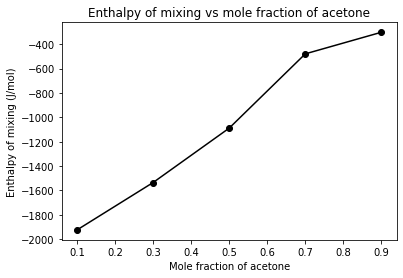

In [24]:
plt.plot(x_a, dH_m_permole, 'o-k')
plt.title('Enthalpy of mixing vs mole fraction of acetone')
plt.xlabel('Mole fraction of acetone')
plt.ylabel('Enthalpy of mixing (J/mol)')

Text(0, 0.5, 'Enthalpy of mixing (J/mol)')

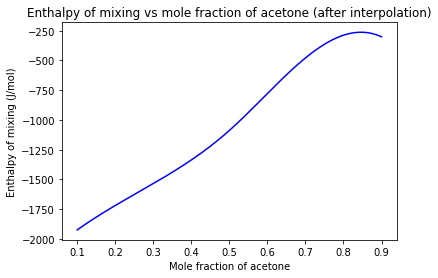

In [29]:
x_a_new = np.linspace(0.1, 0.9, 300)
a_BSpline = interpolate.make_interp_spline(x_a, dH_m_permole)
dH_m_permole_new = a_BSpline(x_a_new)

plt.plot(x_a_new, dH_m_permole_new, '-b')
plt.title('Enthalpy of mixing vs mole fraction of acetone (after interpolation)')
plt.xlabel('Mole fraction of acetone')
plt.ylabel('Enthalpy of mixing (J/mol)')

In [ ]:
slope, intercept = np.polyfit(np.log(length), np.log(time), 1)
print(slope)